<a href="https://colab.research.google.com/github/crystalloide/RAG/blob/main/LAB01_Visualisation_de_la_tokenisation_et_des_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# LAB01 : Visualisation de la tokenisation et des embeddings
---

**Objectif:**
- Comprendre comment un texte est segmenté en tokens et converti en vecteurs numériques(embeddings).
- Apprendre à visualiser et interpréter ces structures.

**Durée estimée:**
- ~20 minutes

**Livrable :**
- Notebook avec graphiques présentant la segmentation en tokens et une visualisation 2D de vecteurs numériques.


---


## Step 1: Pré-requis (5 min)

Installation des librairies nécessaires :

In [1]:
!pip install openai tiktoken matplotlib scikit-learn python-dotenv -q

### Configuration de la clé "OpenAI API Key" :

Puisque nous faisons ce notebook dans Google Colab, nos allons utiliser `userdata.get()` pour récupérer l'API key en toute sécurité :

Si cela n'a pas déjà été fait :
- Ouvre Google Colab → File → Upload notebook
- Ajoute ta clé API OpenAI :
  - Clique sur 🔑 (Secrets Manager)
  - Puis sur "+ Ajouter un secret"
  - Ajoute OPENAI_API_KEY et la valeur associée
  - Veiile à rendre le secret accessible depuis le notebook ( active "accès depuis le notebook")

In [2]:
import os
from google.colab import userdata

# Get API key from Colab Secrets (add it in the Secrets manager: 🔑 icon on left panel)
os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

# Or if running locally with .env file:
# from dotenv import load_dotenv
# load_dotenv()

print("✓ API Key configured successfully")

✓ API Key configured successfully


---
## Step 2: Inspection de la tokenisation (5 min)

Utilisation de tiktoken (le tokenizer d’OpenAI) pour découper le texte en tokens :

In [3]:
import tiktoken

# Initialize tokenizer for GPT-4o mini
enc = tiktoken.encoding_for_model("gpt-4o-mini")

# Sample text
sample_text = "Agentic AI agents can plan, reason, and use tools."

# Tokenize
tokens = enc.encode(sample_text)

# Display results
print("="*70)
print(f"Texte originel: {sample_text}")
print(f"Nombre de tokens: {len(tokens)}")
print(f"Token IDs: {tokens}")
print("\nTokens décodés (individuellement):")
for i, token_id in enumerate(tokens, 1):
    decoded = enc.decode([token_id])
    print(f"  {i}. ID {token_id}: '{decoded}'")
print("="*70)

Texte originel: Agentic AI agents can plan, reason, and use tools.
Nombre de tokens: 13
Token IDs: [18086, 291, 20837, 19297, 665, 3496, 11, 5207, 11, 326, 1199, 8437, 13]

Tokens décodés (individuellement):
  1. ID 18086: 'Agent'
  2. ID 291: 'ic'
  3. ID 20837: ' AI'
  4. ID 19297: ' agents'
  5. ID 665: ' can'
  6. ID 3496: ' plan'
  7. ID 11: ','
  8. ID 5207: ' reason'
  9. ID 11: ','
  10. ID 326: ' and'
  11. ID 1199: ' use'
  12. ID 8437: ' tools'
  13. ID 13: '.'


### Expérimentez avec différents types de texte

Regardons comment la ponctuation, les espaces, les émojis et les caractères spéciaux affectent la tokenisation :

In [4]:
test_texts = [
    "Hello, World!",
    "HelloWorld",
    "hello world",
    "AI is 🔥",
    "def my_function():\n    return True",
    "AGENTIC",
    "agentic",
]

print("\n" + "="*70)
print("Analyse de la Tokenisation sur différents exemples de texte")
print("="*70)

for text in test_texts:
    tokens = enc.encode(text)
    decoded = [enc.decode([t]) for t in tokens]
    print(f"\nText: {repr(text)}")
    print(f"Tokens: {len(tokens)} → {tokens}")
    print(f"Decoded: {decoded}")


Analyse de la Tokenisation sur différents exemples de texte

Text: 'Hello, World!'
Tokens: 4 → [13225, 11, 5922, 0]
Decoded: ['Hello', ',', ' World', '!']

Text: 'HelloWorld'
Tokens: 2 → [13225, 13046]
Decoded: ['Hello', 'World']

Text: 'hello world'
Tokens: 2 → [24912, 2375]
Decoded: ['hello', ' world']

Text: 'AI is 🔥'
Tokens: 4 → [17527, 382, 113718, 98]
Decoded: ['AI', ' is', ' �', '�']

Text: 'def my_function():\n    return True'
Tokens: 7 → [1314, 922, 21094, 8595, 271, 622, 6432]
Decoded: ['def', ' my', '_function', '():\n', '   ', ' return', ' True']

Text: 'AGENTIC'
Tokens: 3 → [2971, 2829, 2022]
Decoded: ['AG', 'ENT', 'IC']

Text: 'agentic'
Tokens: 2 → [16932, 291]
Decoded: ['agent', 'ic']


---
## Step 3 : Comparaison du nombre de tokens (jetons) dans les textes (5 min)


Comparaison de la longueur des Tokens
                                                                                     Text  Character Count  Token Count  Ratio (Chars/Token)
                                                                           AI is amazing.               14            4                 3.50
                                                      Artificial Intelligence is amazing.               35            5                 7.00
                                                                                 AI is 🔥.                8            5                 1.60
                                             The quick brown fox jumps over the lazy dog.               44           10                 4.40
The quick brown fox jumps over the lazy dog. The quick brown fox jumps over the lazy dog.               89           20                 4.45


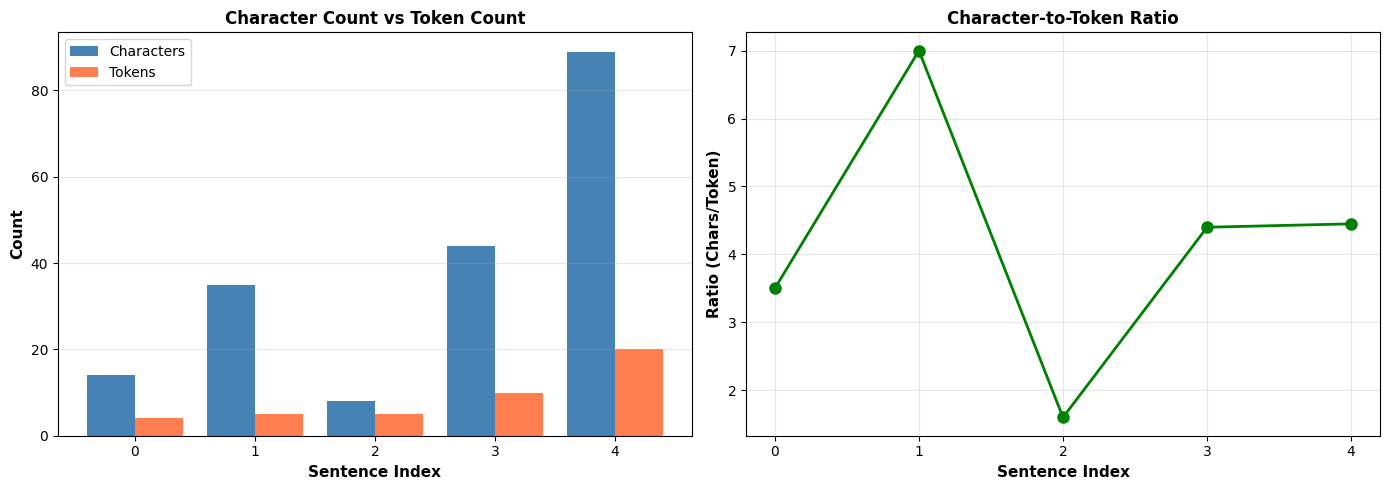


💡 Remarque : Les émojis et les symboles spéciaux ont tendance à utiliser plus de jetons par caractère !


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

sentences = [
    "AI is amazing.",
    "Artificial Intelligence is amazing.",
    "AI is 🔥.",
    "The quick brown fox jumps over the lazy dog.",
    "The quick brown fox jumps over the lazy dog. The quick brown fox jumps over the lazy dog.",
]

# Collect data
data = []
for sentence in sentences:
    token_list = enc.encode(sentence)
    data.append({
        "Text": sentence,
        "Character Count": len(sentence),
        "Token Count": len(token_list),
        "Ratio (Chars/Token)": len(sentence) / len(token_list)
    })

df = pd.DataFrame(data)
print("\n" + "="*100)
print("Comparaison de la longueur des Tokens")
print("="*100)
print(df.to_string(index=False))
print("="*100)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart: Character vs Token count
x = range(len(df))
axes[0].bar([i - 0.2 for i in x], df['Character Count'], width=0.4, label='Characters', color='steelblue')
axes[0].bar([i + 0.2 for i in x], df['Token Count'], width=0.4, label='Tokens', color='coral')
axes[0].set_xlabel('Sentence Index', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[0].set_title('Character Count vs Token Count', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Line chart: Char/Token ratio
axes[1].plot(x, df['Ratio (Chars/Token)'], marker='o', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Sentence Index', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Ratio (Chars/Token)', fontsize=11, fontweight='bold')
axes[1].set_title('Character-to-Token Ratio', fontsize=12, fontweight='bold')
axes[1].set_xticks(x)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Remarque : Les émojis et les symboles spéciaux ont tendance à utiliser plus de jetons par caractère !")

---
## Step 4: Génération des vecteurs (embeddings) (10 min)

Utilisons le modèle `text-embedding-3-small` d'OpenAI pour créer des vecteurs numériques :

In [6]:
from openai import OpenAI
import numpy as np

# Initialize OpenAI client
client = OpenAI()

# Texts to embed
texts = [
    "Agentic AI",
    "Autonomous agents",
    "Bananas are yellow",
    "Machine learning models",
    "Fruit is delicious",
]

embeddings = []

print("\n" + "="*70)
print("GENERATING EMBEDDINGS")
print("="*70)

for text in texts:
    resp = client.embeddings.create(
        model="text-embedding-3-small",
        input=text
    )
    vector = resp.data[0].embedding
    embeddings.append(vector)
    print(f"✓ '{text}' → Vector length: {len(vector)}")

print("="*70)
print(f"\n📊 Embedding Dimension: {len(embeddings[0])}")
print(f"Number of texts embedded: {len(embeddings)}")

# Show a sample embedding (first 20 values)
print(f"\nSample embedding (first 20 values) for '{texts[0]}':")
print(embeddings[0][:20])


GENERATING EMBEDDINGS
✓ 'Agentic AI' → Vector length: 1536
✓ 'Autonomous agents' → Vector length: 1536
✓ 'Bananas are yellow' → Vector length: 1536
✓ 'Machine learning models' → Vector length: 1536
✓ 'Fruit is delicious' → Vector length: 1536

📊 Embedding Dimension: 1536
Number of texts embedded: 5

Sample embedding (first 20 values) for 'Agentic AI':
[-0.011057556606829166, 0.016345327720046043, -0.021669069305062294, 0.03211511671543121, 0.021697847172617912, -0.013661873526871204, -0.013194247148931026, 0.04710792377591133, 0.001640288159251213, -0.007348922546952963, 0.009625901468098164, -0.03153957426548004, -0.00021414124057628214, -0.0609496533870697, -0.03153957426548004, -0.02729497104883194, -0.03030216507613659, -0.06100720912218094, 0.021064752712845802, -0.06520865112543106]


---
## Step 5: Réduction de dimensionnalité et visualisation (5 min)

Réduire les dimensions des vecteurs/embeddings de 1536 dimensions à 2D pour permettre la visualisation :


📈 PCA Explained Variance:
  PC1: 0.4516 (45.16%)
  PC2: 0.2295 (22.95%)
  Total: 0.6811 (68.11%)


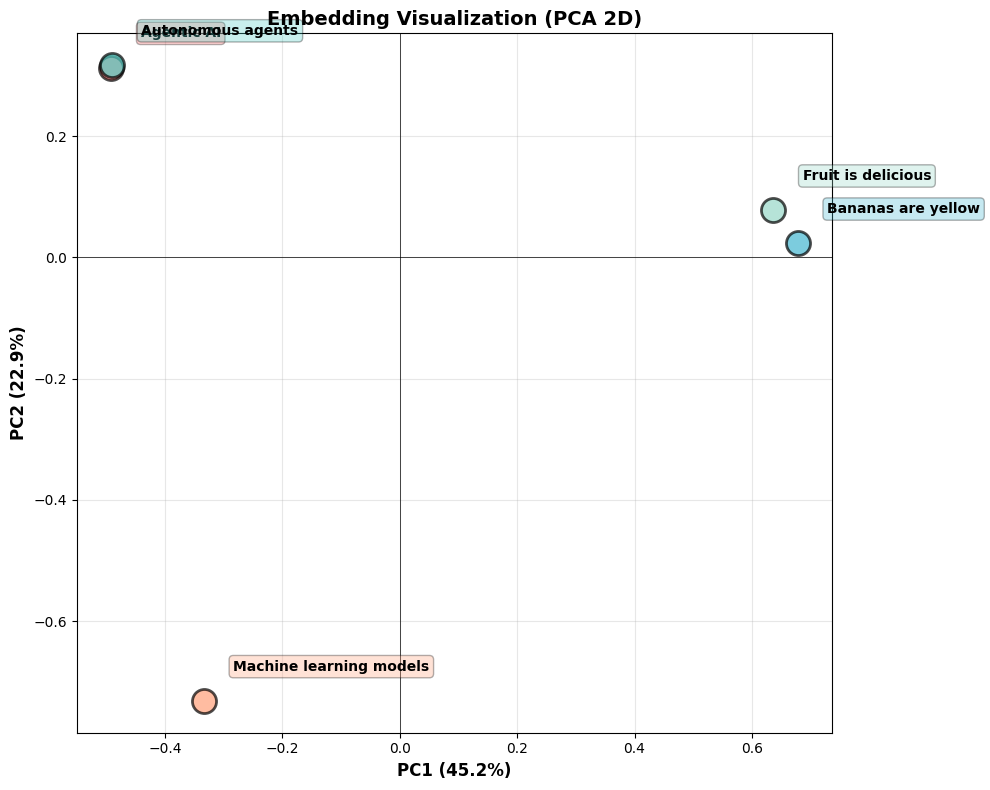


💡 Remarque : Les textes sémantiquement similaires se retrouvent proches les uns des autres !!


In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Calculate explained variance
explained_var = pca.explained_variance_ratio_
total_var = sum(explained_var)

print(f"\n📈 PCA Explained Variance:")
print(f"  PC1: {explained_var[0]:.4f} ({explained_var[0]*100:.2f}%)")
print(f"  PC2: {explained_var[1]:.4f} ({explained_var[1]*100:.2f}%)")
print(f"  Total: {total_var:.4f} ({total_var*100:.2f}%)")

# Create visualization
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

for i, (txt, color) in enumerate(zip(texts, colors)):
    x, y = embeddings_2d[i]
    plt.scatter(x, y, s=300, alpha=0.7, color=color, edgecolors='black', linewidth=2)
    plt.text(x + 0.05, y + 0.05, txt, fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.3))

plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}%)', fontsize=12, fontweight='bold')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}%)', fontsize=12, fontweight='bold')
plt.title('Embedding Visualization (PCA 2D)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\n💡 Remarque : Les textes sémantiquement similaires se retrouvent proches les uns des autres !!")

### Explorateur interactif d'embeddings

Ajoutons d'autres phrases et visualisons les groupes :


Generating embeddings for extended set...


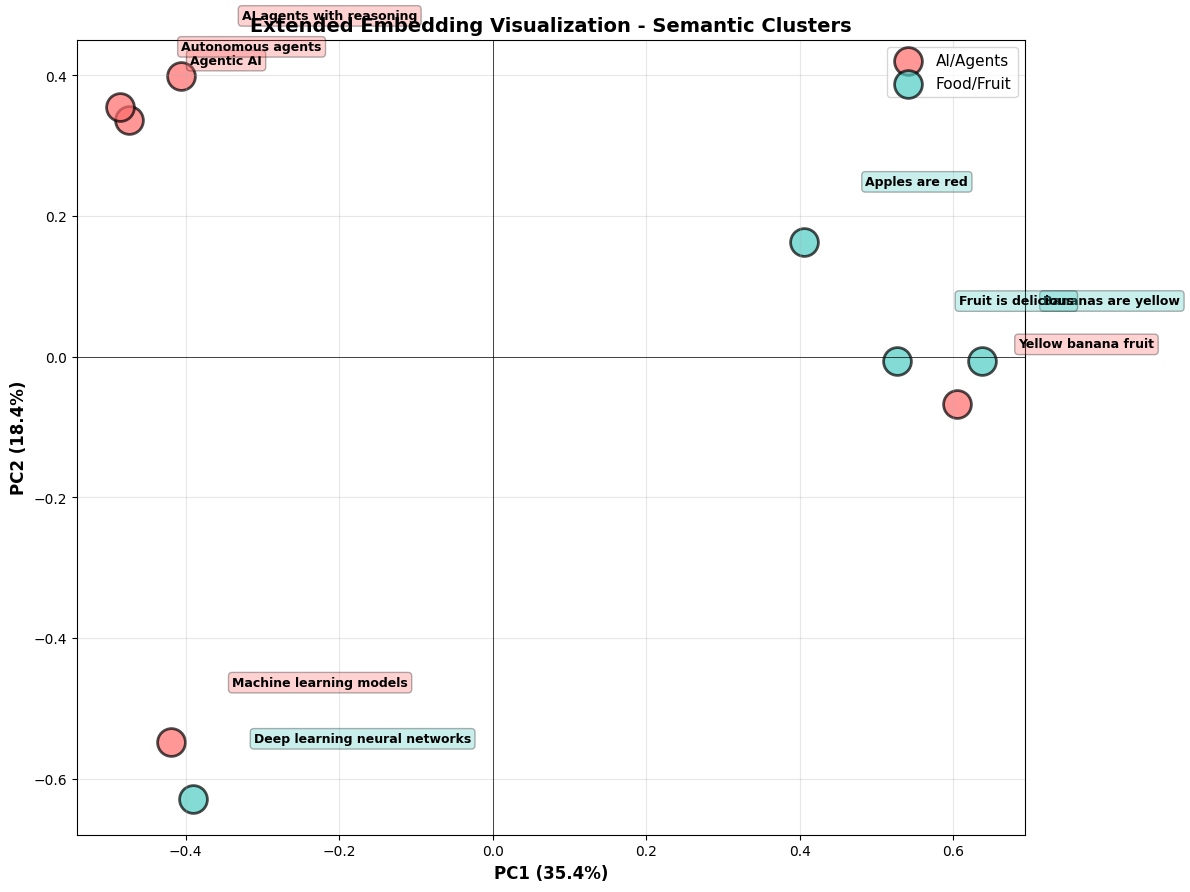

In [8]:
# Expand with more related texts
extended_texts = texts + [
    "AI agents with reasoning",
    "Yellow banana fruit",
    "Deep learning neural networks",
    "Apples are red",
]

# Generate embeddings for new texts
extended_embeddings = []

print("\nGenerating embeddings for extended set...")
for text in extended_texts:
    resp = client.embeddings.create(
        model="text-embedding-3-small",
        input=text
    )
    extended_embeddings.append(resp.data[0].embedding)

# Apply PCA
pca_ext = PCA(n_components=2)
embeddings_2d_ext = pca_ext.fit_transform(extended_embeddings)

# Categorize texts
categories = {
    'AI/Agents': [0, 1, 3, 5, 6],
    'Food/Fruit': [2, 4, 7, 8],
}

category_colors = {'AI/Agents': '#FF6B6B', 'Food/Fruit': '#4ECDC4'}

# Visualize
fig, ax = plt.subplots(figsize=(12, 9))

for category, indices in categories.items():
    for idx in indices:
        x, y = embeddings_2d_ext[idx]
        ax.scatter(x, y, s=400, alpha=0.7, color=category_colors[category],
                  edgecolors='black', linewidth=2, label=category if idx == indices[0] else '')
        ax.text(x + 0.08, y + 0.08, extended_texts[idx], fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor=category_colors[category], alpha=0.3))

ax.set_xlabel(f'PC1 ({pca_ext.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_ext.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12, fontweight='bold')
ax.set_title('Extended Embedding Visualization - Semantic Clusters', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

# Remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), fontsize=11, loc='best')

plt.tight_layout()
plt.show()

---
## Step 6: Expérimentation sur la similarité sémantique (5 min)

Calcul de la similarité cosinus entre les embeddings :


COSINE SIMILARITY MATRIX
                         Agentic AI  Autonomous agents  Bananas are yellow  \
Agentic AI                   1.0000             0.5841              0.0298   
Autonomous agents            0.5841             1.0000              0.0369   
Bananas are yellow           0.0298             0.0369              1.0000   
Machine learning models      0.3360             0.3337              0.0416   
Fruit is delicious           0.0666             0.0604              0.3860   

                         Machine learning models  Fruit is delicious  
Agentic AI                                0.3360              0.0666  
Autonomous agents                         0.3337              0.0604  
Bananas are yellow                        0.0416              0.3860  
Machine learning models                   1.0000              0.0581  
Fruit is delicious                        0.0581              1.0000  


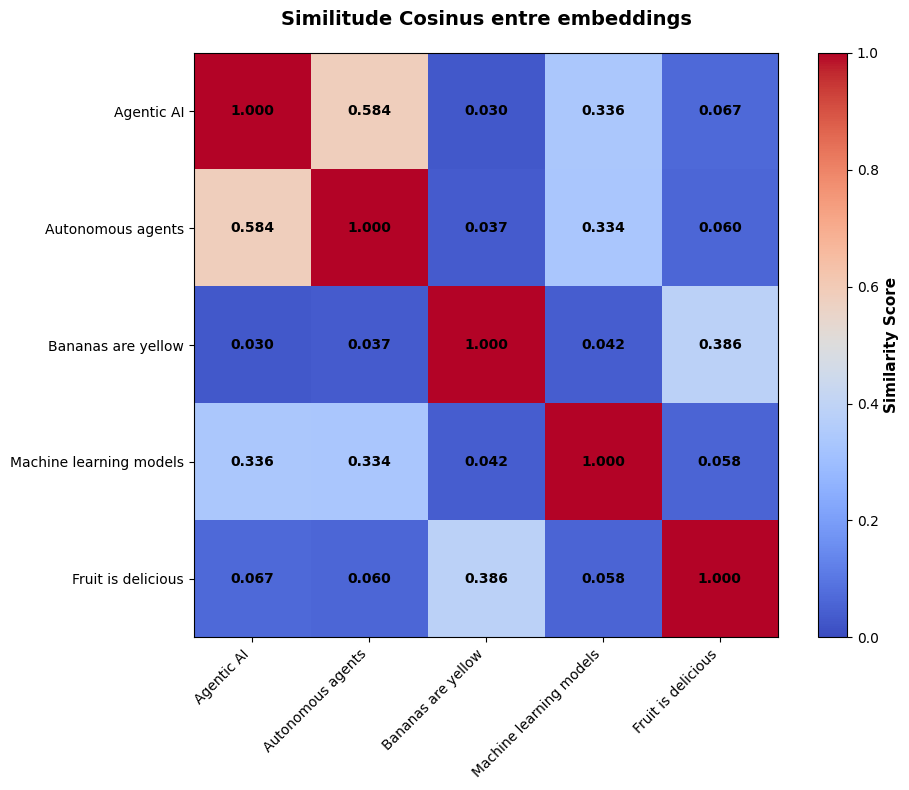


🔍 Key Similarities:

  🏆 Plus similaires :
    'Agentic AI' ↔ 'Autonomous agents': 0.5841
    'Bananas are yellow' ↔ 'Fruit is delicious': 0.3860
    'Agentic AI' ↔ 'Machine learning models': 0.3360

  ❄️  Moins similaires :
    'Bananas are yellow' ↔ 'Machine learning models': 0.0416
    'Autonomous agents' ↔ 'Bananas are yellow': 0.0369
    'Agentic AI' ↔ 'Bananas are yellow': 0.0298


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Use original 5 texts for clarity
similarity_matrix = cosine_similarity(embeddings)

# Create DataFrame for better visualization
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=texts,
    columns=texts
)

print("\n" + "="*100)
print("COSINE SIMILARITY MATRIX")
print("="*100)
print(similarity_df.round(4))
print("="*100)

# Visualization
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(similarity_matrix, cmap='coolwarm', vmin=0, vmax=1)

ax.set_xticks(range(len(texts)))
ax.set_yticks(range(len(texts)))
ax.set_xticklabels(texts, rotation=45, ha='right')
ax.set_yticklabels(texts)

# Add values to heatmap
for i in range(len(texts)):
    for j in range(len(texts)):
        text = ax.text(j, i, f'{similarity_matrix[i, j]:.3f}',
                       ha="center", va="center", color="black", fontweight='bold')

ax.set_title('Similitude Cosinus entre embeddings', fontsize=14, fontweight='bold', pad=20)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Similarity Score', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Find most and least similar pairs
print("\n🔍 Key Similarities:")
similarities_list = []
for i in range(len(texts)):
    for j in range(i+1, len(texts)):
        similarities_list.append((texts[i], texts[j], similarity_matrix[i, j]))

similarities_list.sort(key=lambda x: x[2], reverse=True)

print("\n  🏆 Plus similaires :")
for text1, text2, score in similarities_list[:3]:
    print(f"    '{text1}' ↔ '{text2}': {score:.4f}")

print("\n  ❄️  Moins similaires :")
for text1, text2, score in similarities_list[-3:]:
    print(f"    '{text1}' ↔ '{text2}': {score:.4f}")

---
## Step 7: Mini-projet - Explorateur de tokens et d'embeddings (10 min)

Créons une fonction réutilisable pour analyser n'importe quel texte :

In [10]:
class TextAnalyzer:
    """Analyseur complet de tokenisation et d'embeddings sur du texte."""

    def __init__(self, reference_text=None):
        self.enc = tiktoken.encoding_for_model("gpt-4o-mini")
        self.client = OpenAI()
        self.reference_text = reference_text
        self.reference_embedding = None

        if reference_text:
            resp = self.client.embeddings.create(
                model="text-embedding-3-small",
                input=reference_text
            )
            self.reference_embedding = resp.data[0].embedding

    def tokenize(self, text):
        """Tokenize text and return tokens with decoded values."""
        token_ids = self.enc.encode(text)
        token_strs = [self.enc.decode([t]) for t in token_ids]
        return token_ids, token_strs

    def embed(self, text):
        """Generate embedding for text."""
        resp = self.client.embeddings.create(
            model="text-embedding-3-small",
            input=text
        )
        return resp.data[0].embedding

    def analyze(self, text):
        """Comprehensive analysis of input text."""
        token_ids, token_strs = self.tokenize(text)
        embedding = self.embed(text)

        result = {
            'text': text,
            'char_count': len(text),
            'token_count': len(token_ids),
            'tokens': list(zip(token_ids, token_strs)),
            'embedding': embedding,
            'embedding_dim': len(embedding)
        }

        # Compute similarity to reference if available
        if self.reference_embedding:
            similarity = cosine_similarity(
                [embedding],
                [self.reference_embedding]
            )[0][0]
            result['similarity_to_reference'] = similarity

        return result

    def display_analysis(self, text):
        """Print formatted analysis."""
        analysis = self.analyze(text)

        print("\n" + "="*80)
        print(f"TEXTE: '{analysis['text']}'")
        print("="*80)
        print(f"Nombre de caractères : {analysis['char_count']}")
        print(f"Nombre de tokens : {analysis['token_count']}")
        print(f"Dimension Embedding : {analysis['embedding_dim']}")

        if 'similarity_to_reference' in analysis:
            print(f"\nSimilarité avec la Reference ('{self.reference_text}'): {analysis['similarity_to_reference']:.4f}")

        print("\nTokens:")
        for i, (token_id, token_str) in enumerate(analysis['tokens'], 1):
            print(f"  {i:2d}. ID {token_id:5d} → '{token_str}'")

        print(f"\nPrévisualisation des Embeddings (10 première valeurs): {analysis['embedding'][:10]}")
        print("="*80)

# Initialize analyzer with a reference text
analyzer = TextAnalyzer(reference_text="AI and agents")

# Test with different texts
test_sentences = [
    "Agentic AI systems are intelligent.",
    "Machine learning requires data.",
    "I love bananas 🍌",
]

for sentence in test_sentences:
    analyzer.display_analysis(sentence)


TEXTE: 'Agentic AI systems are intelligent.'
Nombre de caractères : 35
Nombre de tokens : 7
Dimension Embedding : 1536

Similarité avec la Reference ('AI and agents'): 0.6040

Tokens:
   1. ID 18086 → 'Agent'
   2. ID   291 → 'ic'
   3. ID 20837 → ' AI'
   4. ID  7511 → ' systems'
   5. ID   553 → ' are'
   6. ID 32075 → ' intelligent'
   7. ID    13 → '.'

Prévisualisation des Embeddings (10 première valeurs): [-0.0012949331430718303, 0.019650550559163094, -0.030881254002451897, 0.026963863521814346, 0.03194963186979294, -0.0007845911895856261, -0.034722331911325455, 0.03596877679228783, 0.02635335922241211, -0.006912669632583857]

TEXTE: 'Machine learning requires data.'
Nombre de caractères : 31
Nombre de tokens : 5
Dimension Embedding : 1536

Similarité avec la Reference ('AI and agents'): 0.2947

Tokens:
   1. ID 25519 → 'Machine'
   2. ID  7524 → ' learning'
   3. ID 10860 → ' requires'
   4. ID  1238 → ' data'
   5. ID    13 → '.'

Prévisualisation des Embeddings (10 première v

### Testons avec nos propres textes

Essayez d'ajouter vos phrases personnalisées ci-dessous :

In [11]:
# Add your own sentences here for analysis!
custom_texts = [
    "Your sentence here",
    "Another sentence",
    "Add as many as you want",
]

for text in custom_texts:
    analyzer.display_analysis(text)


TEXTE: 'Your sentence here'
Nombre de caractères : 18
Nombre de tokens : 3
Dimension Embedding : 1536

Similarité avec la Reference ('AI and agents'): 0.1905

Tokens:
   1. ID  9719 → 'Your'
   2. ID 21872 → ' sentence'
   3. ID  2105 → ' here'

Prévisualisation des Embeddings (10 première valeurs): [0.021317392587661743, -0.0027783247642219067, -0.017121054232120514, 0.02573753334581852, -0.018365968018770218, 0.0026349499821662903, -0.0018708668649196625, 0.0299338698387146, 0.020492112264037132, -0.02092573419213295]

TEXTE: 'Another sentence'
Nombre de caractères : 16
Nombre de tokens : 2
Dimension Embedding : 1536

Similarité avec la Reference ('AI and agents'): 0.2154

Tokens:
   1. ID 21269 → 'Another'
   2. ID 21872 → ' sentence'

Prévisualisation des Embeddings (10 première valeurs): [0.021552348509430885, -0.0060274736024439335, -0.03301819786429405, 0.029512349516153336, 0.02556108497083187, 0.033506717532873154, 0.002153438748791814, 0.015172853134572506, 0.031437691301107

---
## Step 8: Visualisation avancée - Réseau de similarité

Créons un graphique de réseau illustrant les relations de similarité :

/tmp/ipython-input-3226428312.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ai_patch = mpatches.Patch(color='#FF6B6B', label='AI/Agents', edgecolor='black')
/tmp/ipython-input-3226428312.py:45: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  food_patch = mpatches.Patch(color='#4ECDC4', label='Food/Fruit', edgecolor='black')


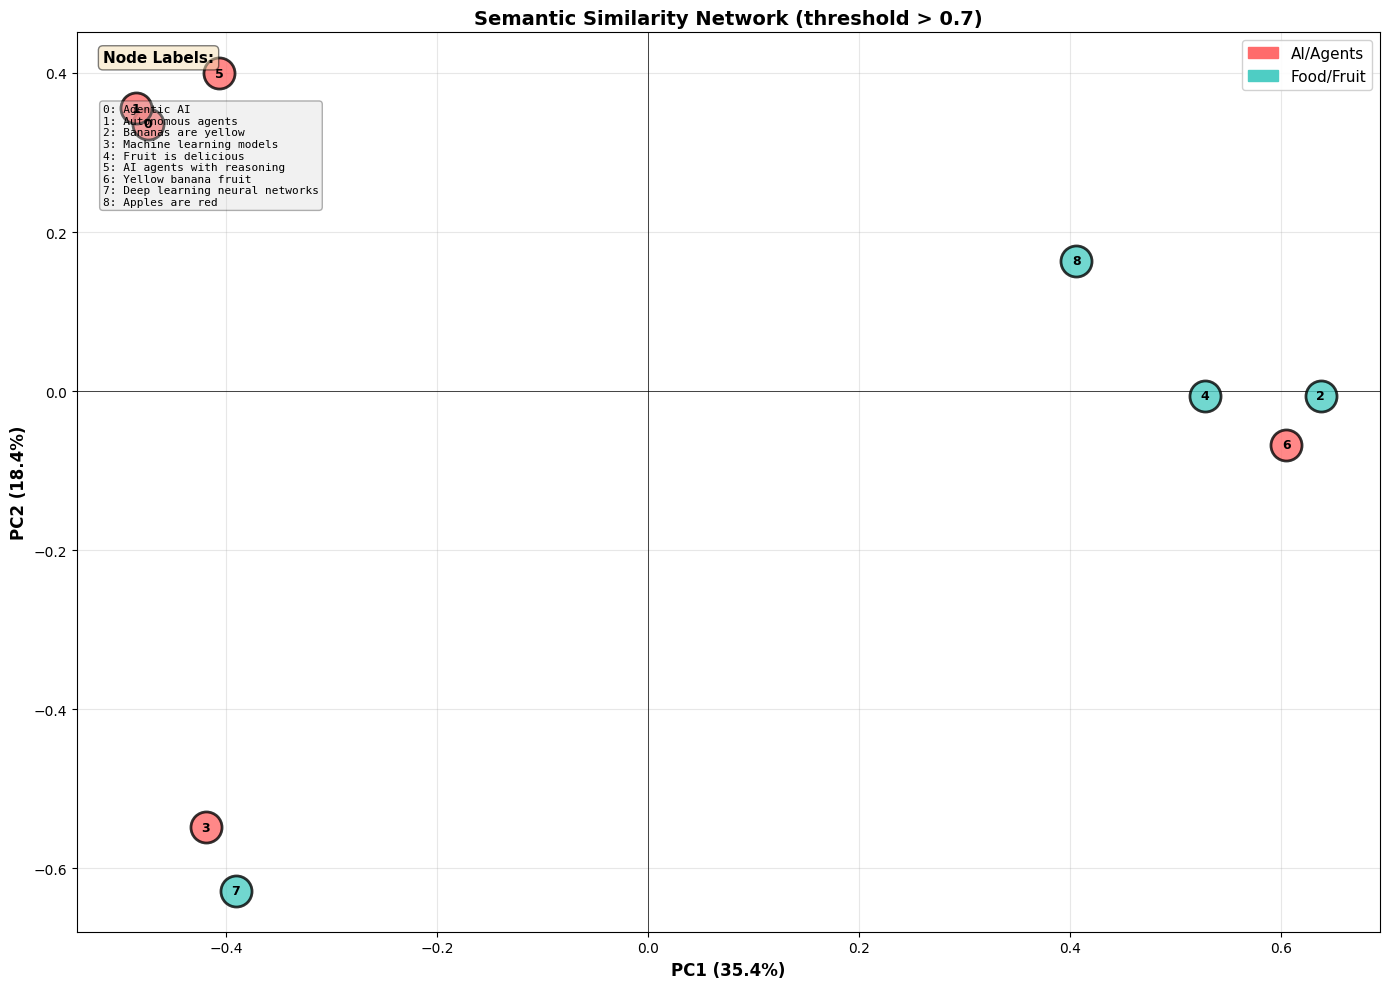


📊 Network Statistics (Threshold: 0.7):

Total connections: 0


In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch
import numpy as np

# Use extended_texts from earlier
similarity_matrix_ext = cosine_similarity(extended_embeddings)

# Create network visualization
fig, ax = plt.subplots(figsize=(14, 10))

# Use 2D embedding positions as node positions
positions = embeddings_2d_ext

# Draw edges (similarity links) - only if similarity > threshold
threshold = 0.7
for i in range(len(extended_texts)):
    for j in range(i+1, len(extended_texts)):
        sim = similarity_matrix_ext[i, j]
        if sim > threshold:
            x1, y1 = positions[i]
            x2, y2 = positions[j]
            # Line opacity and width based on similarity
            alpha = (sim - threshold) / (1 - threshold) * 0.8
            width = 1 + (sim - threshold) / (1 - threshold) * 3
            ax.plot([x1, x2], [y1, y2], 'k-', alpha=alpha, linewidth=width)

# Draw nodes
for idx, (text, (x, y)) in enumerate(zip(extended_texts, positions)):
    category = 'AI/Agents' if idx in categories['AI/Agents'] else 'Food/Fruit'
    color = category_colors[category]
    ax.scatter(x, y, s=500, alpha=0.8, color=color, edgecolors='black', linewidth=2, zorder=3)
    ax.text(x, y, str(idx), ha='center', va='center', fontsize=9, fontweight='bold', zorder=4)

# Add legend with text labels
ax.text(0.02, 0.98, 'Node Labels:', transform=ax.transAxes, fontsize=11, fontweight='bold',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

label_text = '\n'.join([f"{i}: {text}" for i, text in enumerate(extended_texts)])
ax.text(0.02, 0.92, label_text, transform=ax.transAxes, fontsize=8, verticalalignment='top',
        family='monospace', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.3))

# Add category legend
ai_patch = mpatches.Patch(color='#FF6B6B', label='AI/Agents', edgecolor='black')
food_patch = mpatches.Patch(color='#4ECDC4', label='Food/Fruit', edgecolor='black')
ax.legend(handles=[ai_patch, food_patch], loc='upper right', fontsize=11, framealpha=0.9)

ax.set_xlabel(f'PC1 ({pca_ext.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_ext.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12, fontweight='bold')
ax.set_title(f'Semantic Similarity Network (threshold > {threshold})', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print(f"\n📊 Network Statistics (Threshold: {threshold}):")
connection_count = 0
for i in range(len(extended_texts)):
    for j in range(i+1, len(extended_texts)):
        if similarity_matrix_ext[i, j] > threshold:
            connection_count += 1
            print(f"  [{i}] '{extended_texts[i]}' ↔ [{j}] '{extended_texts[j]}': {similarity_matrix_ext[i, j]:.4f}")

print(f"\nTotal connections: {connection_count}")

---
## Résumé et points clés

### Ce que nous avons appris :

1. **La tokenisation** divise le texte en unités discrètes compréhensibles par les modèles.

    - Différents textes ont des ratios token/caractère différents.

    - Les émojis et les caractères spéciaux utilisent davantage de tokens.

2. **Les embeddings** convertissent les tokens en vecteurs numériques de grande dimension.

    - Le modèle d'embedding d'OpenAP `text-embedding-3-small` produit des vecteurs de dimension 1536.

    - Ces vecteurs capturent le sens sémantique.

3. **La réduction de dimensionnalité** (ACP) permet de visualiser les plongements lexicaux.

    - On peut réduire la dimensionnalité de 1536 à 2D tout en préservant les relations sémantiques.

    - Les textes sémantiquement similaires se regroupent.

4. **La similarité cosinus** mesure la proximité sémantique.

    - Les scores varient de 0 (opposé) à 1 (identique).

    - Utilisée dans les applications RAG, de recherche sémantique et LLM.

### Applications :

  - **RAG** Génération augmentée par la recherche (RAG) : Trouver des documents pertinents en s'appuyant sur leur similarité.

  - **Recherche sémantique** : Trouver des textes similaires, même sans correspondance de mots-clés.

  - **Clustering** : Regrouper les documents sémantiquement similaires.

  - **Systèmes de recommandation** : Suggérer des articles similaires en fonction des plongements lexicaux.

  - **Raisonnement LLM** : Les modèles utilisent les plongements lexicaux en interne pour le raisonnement.

### Prochaines étapes :

- Créer un pipeline RAG simple avec des bases de données vectorielles (Pinecone, Weaviate).

- Expérimenter différents modèles de plongement lexical.

- Créer des applications de recherche sémantique.

- Explorer la tokenisation avancée pour les textes multilingues.

          
---

🎓 **TP terminé ! Nous comprenons maintenant comment le texte est transformé en nombres dans les LLM.**